In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import PublicDataReader as pdr
# 애플코딕 설치되어 있을때
plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/MillionVolt/법정동별_데이터_병합.csv')
df1 = df[df['전기']!=0]
df1.head(3)

,법정동코드,자치구명,법정동명,전기,면적(km2),충전소개수(급속),충전소개수(완속),차충비(급속),차충비(완속),인근충전소거리(급속),충전소중심지거리,전기차밀도,충전소밀도(급속),충전소밀도(완속),20대~60대총생활인구수,교통량평균
0,1111010100,종로구,청운동,62.0,0.797033,0.0,0.0,62.00,62.000000,311.662258,235.900968,77.79,0.0,0.00,11918.205426,507.767059
3,1111010600,종로구,통의동,320.0,0.062960,0.0,0.0,320.00,320.000000,311.662258,235.900968,5082.57,0.0,0.00,20716.319500,909.251765
12,1111011900,종로구,세종로,279.0,0.888697,4.0,26.0,69.75,10.730769,7.440000,769.700000,313.94,4.5,29.26,54212.507835,946.500000


- 자치구별 충전량

In [3]:
charging_quantity = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/서울시 전기차 급속충전기 정보 현황.csv', encoding = 'cp949')
charging_quantity_df = pd.DataFrame(charging_quantity.groupby('시군구')['사용량(kWh)'].sum()).reset_index()
charging_quantity_df = charging_quantity_df.rename(columns = {'시군구' : '자치구명'})
charging_quantity_df

,자치구명,사용량(kWh)
0,강남구,1.378437e+06
1,강동구,4.963556e+05
2,강북구,2.124923e+05
3,강서구,7.444231e+05
4,관악구,5.700365e+05
5,광진구,6.568748e+05
6,구로구,3.997895e+05
7,금천구,3.362122e+05
8,노원구,6.563076e+05
9,도봉구,4.175811e+05


In [4]:
df2 = pd.merge(df1, charging_quantity_df, on = '자치구명', how = 'left')
df2.head(3) 

,법정동코드,자치구명,법정동명,전기,면적(km2),충전소개수(급속),충전소개수(완속),차충비(급속),차충비(완속),인근충전소거리(급속),충전소중심지거리,전기차밀도,충전소밀도(급속),충전소밀도(완속),20대~60대총생활인구수,교통량평균,사용량(kWh)
0,1111010100,종로구,청운동,62.0,0.797033,0.0,0.0,62.00,62.000000,311.662258,235.900968,77.79,0.0,0.00,11918.205426,507.767059,370913.84
1,1111010600,종로구,통의동,320.0,0.062960,0.0,0.0,320.00,320.000000,311.662258,235.900968,5082.57,0.0,0.00,20716.319500,909.251765,370913.84
2,1111011900,종로구,세종로,279.0,0.888697,4.0,26.0,69.75,10.730769,7.440000,769.700000,313.94,4.5,29.26,54212.507835,946.500000,370913.84


In [5]:
df2['생활인구밀도'] = (df2['20대~60대총생활인구수'] / df2['면적(km2)']).round(2)
df2['교통량밀도'] = (df2['교통량평균'] / df2['면적(km2)']).round(2)

## 급속충전기 수요지수

In [6]:
df2.columns

Index(['법정동코드', '자치구명', '법정동명', '전기', '면적(km2)', '충전소개수(급속)', '충전소개수(완속)',
       '차충비(급속)', '차충비(완속)', '인근충전소거리(급속)', '충전소중심지거리', '전기차밀도', '충전소밀도(급속)',
       '충전소밀도(완속)', '20대~60대총생활인구수', '교통량평균', '사용량(kWh)', '생활인구밀도', '교통량밀도'],
      dtype='object')

- 유의미한 독립변수 확인

In [7]:
import statsmodels.api as sm
# 독립 변수와 종속 변수 설정
X = df2[['전기', '면적(km2)', '충전소개수(급속)', '충전소개수(완속)',
       '인근충전소거리(급속)', '충전소중심지거리', '전기차밀도', '충전소밀도(급속)',
       '충전소밀도(완속)', '20대~60대총생활인구수', '교통량평균','생활인구밀도', '교통량밀도', '사용량(kWh)']]
y = df2['차충비(급속)']

# 상수항 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 생성
model = sm.OLS(y, X)

# 회귀 모델 피팅
result = model.fit()

# 회귀 결과 요약
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                차충비(급속)   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     32.17
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           1.18e-42
Time:                        19:07:49   Log-Likelihood:                -1101.6
No. Observations:                 205   AIC:                             2233.
Df Residuals:                     190   BIC:                             2283.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            60.0904     18.274      3.288

- 다중선형회귀 분석
    - p<0.05 
    - X = '면적(km2)', '충전소개수(완속)','인근충전소거리(급속)', '전기차밀도', '충전소밀도(급속)'

In [8]:
df3 = df2[['법정동코드','자치구명', '법정동명','충전소개수(완속)', '전기차밀도', '충전소밀도(급속)', '생활인구밀도', '교통량밀도', '차충비(급속)']]
df3

,법정동코드,자치구명,법정동명,충전소개수(완속),전기차밀도,충전소밀도(급속),생활인구밀도,교통량밀도,차충비(급속)
0,1111010100,종로구,청운동,0.0,77.79,0.00,14953.22,637.07,62.000000
1,1111010600,종로구,통의동,0.0,5082.57,0.00,329037.81,14441.67,320.000000
2,1111011900,종로구,세종로,26.0,313.94,4.50,61002.22,1065.04,69.750000
3,1111013000,종로구,와룡동,0.0,81.98,4.24,34111.34,1161.99,19.333333
4,1111013900,종로구,팔판동,0.0,482.32,0.00,109778.42,21142.63,20.000000
...,...,...,...,...,...,...,...,...,...
200,1174010600,강동구,둔촌동,98.0,50.38,1.22,8711.54,863.69,41.333333
201,1174010700,강동구,암사동,459.0,70.26,3.18,8191.75,451.25,22.066667
202,1174010800,강동구,성내동,103.0,188.88,6.13,27926.66,1085.26,30.833333
203,1174010900,강동구,천호동,165.0,114.83,7.18,24617.27,492.90,16.000000


In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df3_mm_sc = MinMaxScaler()
df3[['충전소개수(완속)_sc', '전기차밀도_sc', '충전소밀도(급속)_sc', '교통량밀도_sc']] = df3_mm_sc.fit_transform(df3[['충전소개수(완속)', '전기차밀도', '충전소밀도(급속)', '교통량밀도']])
#생활인구밀도는 이상치가 있어서 standardScaler
df3_sd_sc = StandardScaler()
df3['생활인구밀도_sc'] = df3_sd_sc.fit_transform(df3[['생활인구밀도']])

scaled_df3_X = df3[['충전소개수(완속)_sc', '전기차밀도_sc', '충전소밀도(급속)_sc', '생활인구밀도_sc', '교통량밀도_sc']]
df3_y = df3['차충비(급속)']

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

linear_model.fit(scaled_df3_X, df3_y)

y_pred = linear_model.predict(scaled_df3_X)

#모델평가
from sklearn.metrics import mean_squared_error, r2_score
print('MSE : ', mean_squared_error(df3_y, y_pred).round(2))
print('R2 SCORE:', r2_score(df3_y, y_pred).round(2))

#회귀계수
print('X변수:', linear_model.feature_names_in_)
print('회귀계수 :', linear_model.coef_)
print('y절편 :', linear_model.intercept_)
print('회귀식: y = {:.2f} + {:.2f} * 충전소개수(완속)_sc + {:.2f} * 전기차밀도_sc + {:.2f} * 충전소밀도(급속)_sc + {:.2f} * 생활인구밀도_sc + {:.2f} * 교통량밀도_sc'.format(linear_model.intercept_, linear_model.coef_[0], linear_model.coef_[1], linear_model.coef_[2], linear_model.coef_[3], linear_model.coef_[4]))


MSE :  2972.91
R2 SCORE: 0.68
X변수: ['충전소개수(완속)_sc' '전기차밀도_sc' '충전소밀도(급속)_sc' '생활인구밀도_sc' '교통량밀도_sc']
회귀계수 : [ -75.57968341 1124.92286227 -171.37396285  -47.59821194 -160.85091497]
y절편 : 55.08313368999147
회귀식: y = 55.08 + -75.58 * 충전소개수(완속)_sc + 1124.92 * 전기차밀도_sc + -171.37 * 충전소밀도(급속)_sc + -47.60 * 생활인구밀도_sc + -160.85 * 교통량밀도_sc


/var/folders/tz/h0d7hy211kj12my58s3b3m7m0000gn/T/ipykernel_20514/2640766703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['충전소개수(완속)_sc', '전기차밀도_sc', '충전소밀도(급속)_sc', '교통량밀도_sc']] = df3_mm_sc.fit_transform(df3[['충전소개수(완속)', '전기차밀도', '충전소밀도(급속)', '교통량밀도']])
/var/folders/tz/h0d7hy211kj12my58s3b3m7m0000gn/T/ipykernel_20514/2640766703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['충전소개수(완속)_sc', '전기차밀도_sc', '충전소밀도(급속)_sc', '교통량밀도_sc']] = df3_mm_sc.fit_transform(df3[['충전소개수(완속)', '전기차밀도', '충

In [10]:
df3

,법정동코드,자치구명,법정동명,충전소개수(완속),전기차밀도,충전소밀도(급속),생활인구밀도,교통량밀도,차충비(급속),충전소개수(완속)_sc,전기차밀도_sc,충전소밀도(급속)_sc,교통량밀도_sc,생활인구밀도_sc
0,1111010100,종로구,청운동,0.0,77.79,0.00,14953.22,637.07,62.000000,0.000000,0.005805,0.000000,0.009559,-0.305811
1,1111010600,종로구,통의동,0.0,5082.57,0.00,329037.81,14441.67,320.000000,0.000000,0.508609,0.000000,0.243990,2.923612
2,1111011900,종로구,세종로,26.0,313.94,4.50,61002.22,1065.04,69.750000,0.025316,0.029530,0.077479,0.016827,0.167666
3,1111013000,종로구,와룡동,0.0,81.98,4.24,34111.34,1161.99,19.333333,0.000000,0.006226,0.073003,0.018473,-0.108827
4,1111013900,종로구,팔판동,0.0,482.32,0.00,109778.42,21142.63,20.000000,0.000000,0.046446,0.000000,0.357786,0.669183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1174010600,강동구,둔촌동,98.0,50.38,1.22,8711.54,863.69,41.333333,0.095424,0.003051,0.021006,0.013408,-0.369988
201,1174010700,강동구,암사동,459.0,70.26,3.18,8191.75,451.25,22.066667,0.446933,0.005048,0.054752,0.006404,-0.375332
202,1174010800,강동구,성내동,103.0,188.88,6.13,27926.66,1085.26,30.833333,0.100292,0.016965,0.105544,0.017170,-0.172418
203,1174010900,강동구,천호동,165.0,114.83,7.18,24617.27,492.90,16.000000,0.160662,0.009526,0.123623,0.007111,-0.206445


In [11]:
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = scaled_df3_X.columns
vif_data["VIF"] = [variance_inflation_factor(scaled_df3_X.values, i) for i in range(len(scaled_df3_X.columns))]

# 결과 출력
print(vif_data)


        feature       VIF
0  충전소개수(완속)_sc  1.574335
1      전기차밀도_sc  3.383010
2  충전소밀도(급속)_sc  1.462299
3     생활인구밀도_sc  3.565471
4      교통량밀도_sc  1.731865


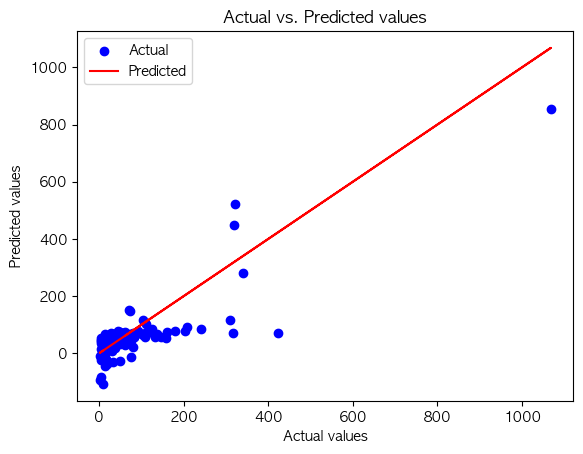

In [12]:
#예측치 그래프 확인
import matplotlib.pyplot as plt

# 예측값과 실제값 그래프
plt.scatter(df3_y, y_pred, color='blue', label='Actual')
plt.plot(df3_y, df3_y, color='red', label='Predicted', linestyle='-')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values')
plt.legend()
plt.show()


/Users/sookyeong/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


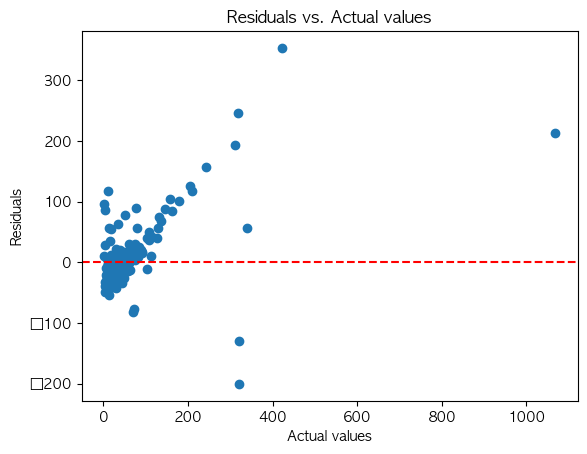

In [13]:
# 잔차 계산
residuals = df3_y - y_pred

# 잔차의 산점도 그리기
plt.scatter(df3_y, residuals)
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual values')
plt.axhline(y=0, color='r', linestyle='--')  # 잔차가 0인 선 추가
plt.show()


- 회귀식 대입
    - 회귀식: y = 55.08 + -75.58 * 충전소개수(완속)_sc + 1124.92 * 전기차밀도_sc + -171.37 * 충전소밀도(급속)_sc + -47.60 * 생활인구밀도_sc + -160.85 * 교통량밀도_sc


In [14]:
df3['수요지수'] = 55.08 + -75.58 * df3['충전소개수(완속)_sc'] + 1124.92 * df3['전기차밀도_sc'] + -171.37 * df3['충전소밀도(급속)_sc'] + -47.60 * df3['생활인구밀도_sc'] + -160.85 * df3['교통량밀도_sc']

df3

/var/folders/tz/h0d7hy211kj12my58s3b3m7m0000gn/T/ipykernel_20514/2923428723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['수요지수'] = 55.08 + -75.58 * df3['충전소개수(완속)_sc'] + 1124.92 * df3['전기차밀도_sc'] + -171.37 * df3['충전소밀도(급속)_sc'] + -47.60 * df3['생활인구밀도_sc'] + -160.85 * df3['교통량밀도_sc']


,법정동코드,자치구명,법정동명,충전소개수(완속),전기차밀도,충전소밀도(급속),생활인구밀도,교통량밀도,차충비(급속),충전소개수(완속)_sc,전기차밀도_sc,충전소밀도(급속)_sc,교통량밀도_sc,생활인구밀도_sc,수요지수
0,1111010100,종로구,청운동,0.0,77.79,0.00,14953.22,637.07,62.000000,0.000000,0.005805,0.000000,0.009559,-0.305811,74.628989
1,1111010600,종로구,통의동,0.0,5082.57,0.00,329037.81,14441.67,320.000000,0.000000,0.508609,0.000000,0.243990,2.923612,448.814593
2,1111011900,종로구,세종로,26.0,313.94,4.50,61002.22,1065.04,69.750000,0.025316,0.029530,0.077479,0.016827,0.167666,62.419875
3,1111013000,종로구,와룡동,0.0,81.98,4.24,34111.34,1161.99,19.333333,0.000000,0.006226,0.073003,0.018473,-0.108827,51.781745
4,1111013900,종로구,팔판동,0.0,482.32,0.00,109778.42,21142.63,20.000000,0.000000,0.046446,0.000000,0.357786,0.669183,17.924928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1174010600,강동구,둔촌동,98.0,50.38,1.22,8711.54,863.69,41.333333,0.095424,0.003051,0.021006,0.013408,-0.369988,63.155227
201,1174010700,강동구,암사동,459.0,70.26,3.18,8191.75,451.25,22.066667,0.446933,0.005048,0.054752,0.006404,-0.375332,34.432748
202,1174010800,강동구,성내동,103.0,188.88,6.13,27926.66,1085.26,30.833333,0.100292,0.016965,0.105544,0.017170,-0.172418,53.942867
203,1174010900,강동구,천호동,165.0,114.83,7.18,24617.27,492.90,16.000000,0.160662,0.009526,0.123623,0.007111,-0.206445,41.151004


In [15]:
df4 = df3[['법정동코드', '자치구명', '법정동명', '수요지수']]
df4.sort_values(by = '수요지수', ascending = False).head(50)

,법정동코드,자치구명,법정동명,수요지수
16,1114011200,중구,남창동,854.499971
14,1114010100,중구,무교동,521.205092
1,1111010600,종로구,통의동,448.814593
175,1168010600,강남구,대치동,282.402653
10,1111017600,종로구,교남동,151.235820
15,1114011100,중구,소공동,149.560468
31,1117012400,용산구,한강로1가,117.100273
75,1129012600,성북구,보문동4가,115.282892
22,1114017100,중구,중림동,101.060565
150,1156011900,영등포구,문래동1가,90.621262
